In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [2]:
# Carregamento do arquivo excel usado para projeto
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(50)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


# ETAPA 1

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**

In [3]:
# Verificação dos tipos de dados do Dataframe

df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

** Optei por alterar a coluna 'Age' de float para Int. Fiz essa alteração porque não vi necessidade da utilização do float nessa coluna, e também com o Int consigo economizar memória.

** Alterei também a coluna 'Number of children' de int64 para int32, porque como são valores baixos também consigo economizar memória.**

In [9]:
# Alteração da coluna 'Number of children' de int64 para int32
df['Number of Children'] = df['Number of Children'].astype('int32')

In [11]:
# Verificação das alterações das colunas
df.dtypes

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int32
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [13]:
# Verificação dos dados nulos no Dataframe
print(df.isnull().sum())


# Calculando o percentual dos valores nulos na coluna 'Age'
percentual_nulos = df['Age'].isnull().mean() * 100
print(f"Percentual de valores nulos na coluna 'Age': {percentual_nulos:.2f}%")



Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64
Percentual de valores nulos na coluna 'Age': 20.73%


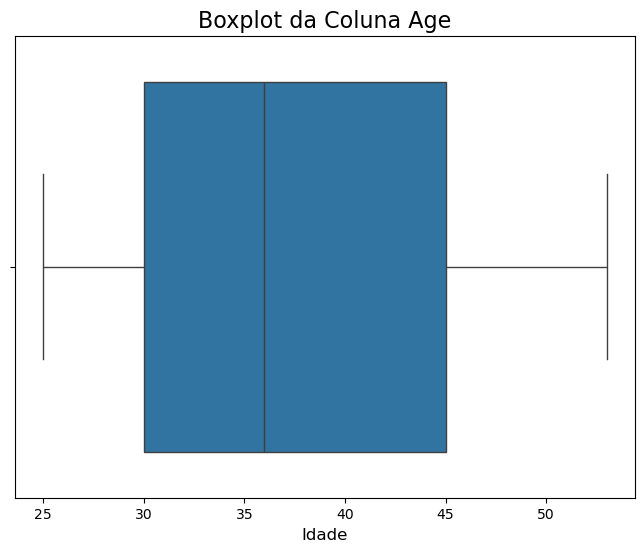

In [12]:
# Criação de um gráfico em Boxplot, para descobrir se tem Outliers na coluna 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Age'])

# Adicionar título e rótulos
plt.title('Boxplot da Coluna Age', fontsize=16)
plt.xlabel('Idade', fontsize=12)

# Mostrar o gráfico
plt.show()

** Com a observação do gráfico do Boxplot, decidi utilizar a mediana para alterar os dados nulos que tem na coluna 'Age'. Utilizei a mediana porque ela não vai ser afetadas por Outliers, visto que não tem segundo o gráfico e pela distribuição "comportada" dos valores de idade.**

In [15]:
# Preenchendo os valores nulos da coluna 'Age' com a mediana.
df['Age'] = df['Age'].fillna(df['Age'].median())

**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [17]:
# Selecionando colunas das variáveis categóricas para verficar erros de digitação
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Exibi os valores únicos para cada coluna categórica
for col in categorical_columns:
    print(f"Coluna '{col}': {df[col].unique()}")

Coluna 'Gender': ['Female' 'Male']
Coluna 'Income': ['50.000,00' '100.000,00' '75.000,00' '125.000,00' '150.000,00'
 '40.000,00' '60.000,00' '80.000,00' '105.000,00' '90.000,00' '135.000,00'
 '35.000,00' '55.000,00' '70.000,00' '95.000,00' '85.000,00' '30.000,00'
 '65.000,00' '115.000,00' '25.000,00' '45.000,00' '130.000,00'
 '155.000,00' '110.000,00' '140.000,00' '37.500,00' '57.500,00'
 '72.500,00' '32.500,00' '52.500,00' '67.500,00' '92.500,00' '82.500,00'
 '122.500,00' '27.500,00' '47.500,00' '62.500,00' '87.500,00' '77.500,00'
 '112.500,00' '117.500,00' '142.500,00' '160.000,00' '97.500,00'
 '145.000,00' '162.500,00' '120.000,00' '102.500,00' '137.500,00'
 '127.500,00' '82.000,00' '68.000,00']
Coluna 'Education': ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Coluna 'Marital Status': ['Single' 'Married']
Coluna 'Home Ownership': ['Rented' 'Owned']
Coluna 'Credit Score': ['High' 'Average' 'Low']


# ETAPA 2

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [19]:
# Função para trazer variáveis quantitativas do Dataframe
df.describe()

,Age,Number of Children
count,164.000000,164.000000
mean,37.195122,0.652439
std,7.586619,0.883346
min,25.000000,0.000000
25%,31.750000,0.000000
50%,36.000000,0.000000
75%,43.000000,1.000000
max,53.000000,3.000000


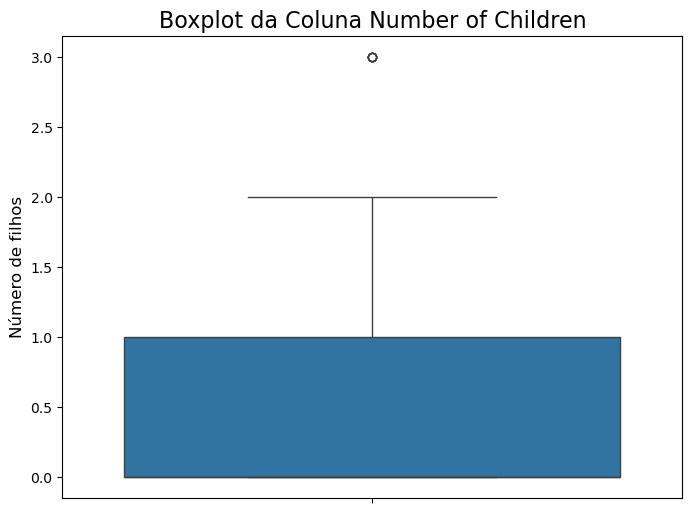

In [21]:
# Criação de um gráfico em Boxplot, para descobrir se tem Outliers na coluna 'Age'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Number of Children'])

# Adicionar título e rótulos
plt.title('Boxplot da Coluna Number of Children', fontsize=16)
plt.ylabel('Número de filhos', fontsize=12)

# Mostrar o gráfico
plt.show()

In [23]:
# Calculando quantas famílias possuem o valor 3 para o número de crianças
num_families_with_3 = df[df['Number of Children'] == 3].shape[0]
print(f"Número de famílias com 3 crianças: {num_families_with_3}")

Número de famílias com 3 crianças: 5


In [25]:
# Calculando o percentual que representa o número de famílias que possuem 3 crianças dentro do Dataframe
total_families = len(df)
percent_with_3 = (num_families_with_3 / total_families) * 100
print(f"Percentual de famílias com 3 crianças: {percent_with_3:.2f}%")

Percentual de famílias com 3 crianças: 3.05%


# Justificativa: Decidi manter os dados de famílias com 3 crianças.
1) Esses dados não vão impactar a média e mediana da análise;
2) Para fins de aprendizado de máquina, é um dado interessante de se ter no Dataframe, para que o modelo não fique enviesado para detectar apenas famílias com um número pequeno de filhos.

# OBS: Como já tinha feito acima um boxplot de idade, não trouxe ele novamente nesse tópico.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

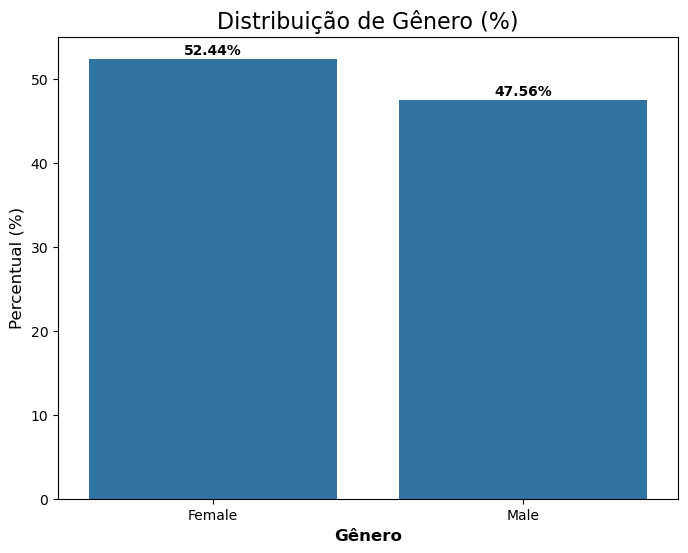

In [27]:
# Calculando a quantidade e percentual de cada gênero da coluna 'Gender'
contagem_genero = df['Gender'].value_counts()
percentual_genero = df['Gender'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_genero.index, y=percentual_genero)
plt.title('Distribuição de Gênero (%)', fontsize=16)
plt.xlabel('Gênero', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_genero):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.show()

## Insights coluna 'Gender'
** A informação que o gráfico nos mostra com um equilíbrio entre os dois gêneros, nos da ideia de que o produto é amplamente aceitado.**

1) Pode se tentar fazer ações de marketing para cada gênero, para testar a aceitação de cada lado
2) Considerar produtos e serviços que priorizem o público feminino, já que representam a maioria. 

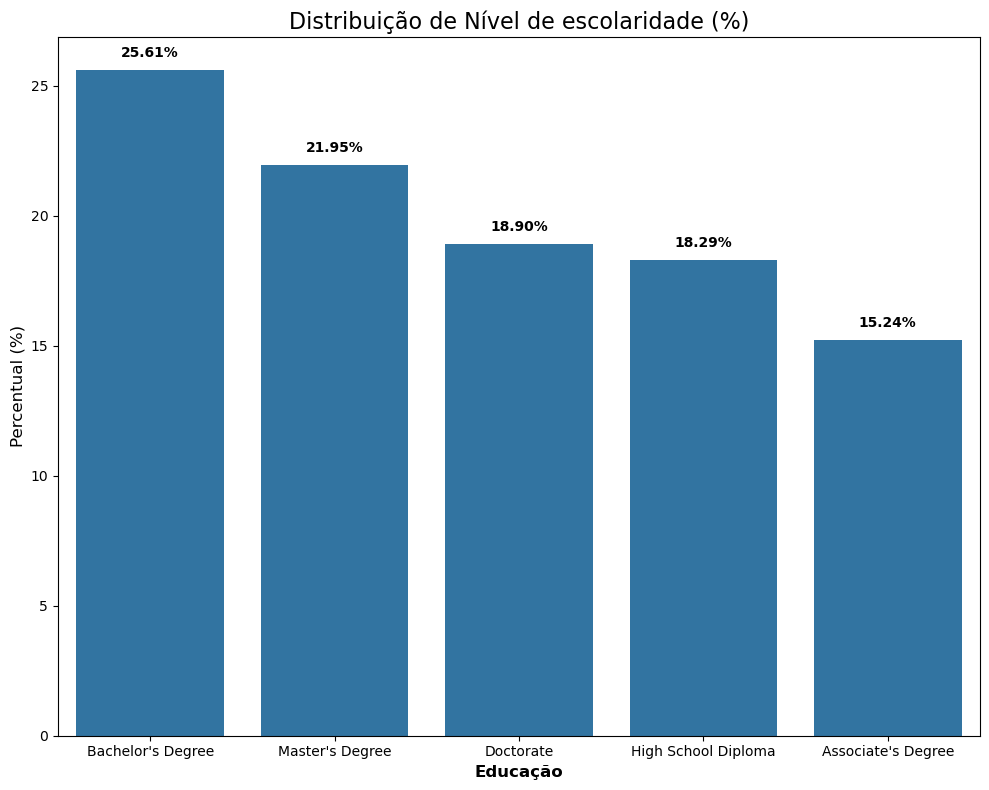

In [29]:
# Calculando a quantidade e percentual de cada tipo de ensindo da coluna 'Education'
contagem_educacao = df['Education'].value_counts()
percentual_educacao = df['Education'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(10, 8))
sns.barplot(x=contagem_educacao.index, y=percentual_educacao)
plt.title('Distribuição de Nível de escolaridade (%)', fontsize=16)
plt.xlabel('Educação', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_educacao):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insights coluna 'Education'
** O gráfico nos mostra, que embora os percentuais de pessoas com maior escolaridade, representem uma base maior dos clientes, não se pode deixar de lado as pessoas que não tem um nível de ensino tão elevado, pois eleas também representam um percentual considerável no nosso Dataframe. Algumas ações que podem ser tomadaas com base nos percentuais apresentado acima: **

1) Como Bachelor's Degree representa um quarto dos nossos clientes, campanhas podem ser pensadas para esse público específico, tentando fidelizar essa parcela dos clientes, ou até mesmo trazer mais clientes que possuem esse nível de ensino
2) Vale também para as pessoas com nível de ensino mais baixo, campanhas com produtos mais acessíveis voltadadas para esse público, também podem ser benéficas para retenção dos clientes ou entrada de novos.

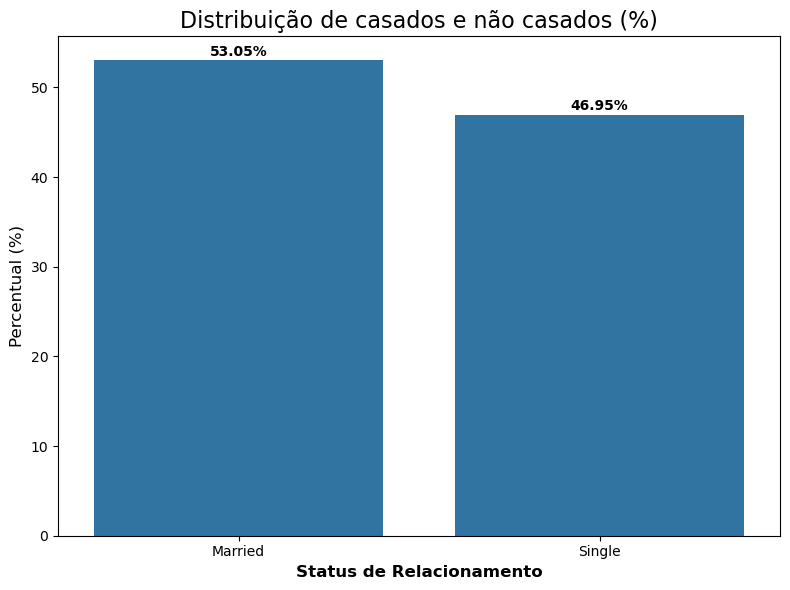

In [75]:
# Calculando a quantidade e percentual de Status de Relacionamento da coluna 'Marital Status'
contagem_status = df['Marital Status'].value_counts()
percentual_status = df['Marital Status'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_status.index, y=percentual_status)
plt.title('Distribuição de casados e não casados (%)', fontsize=16)
plt.xlabel('Status de Relacionamento', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_status):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insights coluna 'Marital Status'

** Como temos uma inclinação para a maior parcela de clientes sendo casada, podemos tomar algumas ações que listo logo abaixo: **

1) Desenvolver campanhas que enfatizem segurança, estabilidade financeira, e produtos/serviços voltados para famílias.
2) Oferecer planos de longo prazo ou benefícios que agreguem valor à vida familiar.

** Para os não casados, podemos tentar as seguintes ações: **

1) Campanhas que enfoquem liberdade, inovação, e desenvolvimento pessoal.
2) Oferecer opções de pagamento mais flexíveis ou produtos que atendam às necessidades de uma vida mais independente.

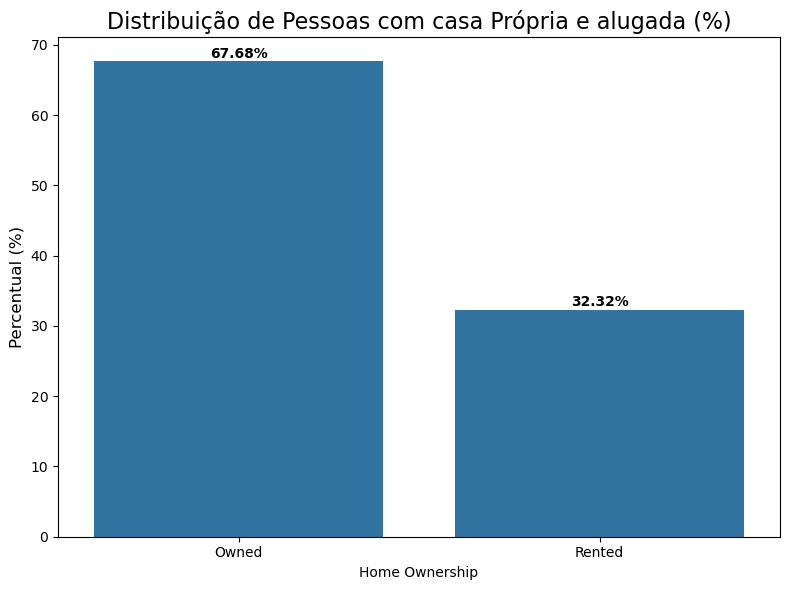

In [31]:
# Calculando a quantidade e percentual de pessoas que possuem casa própria e alugada 'Home Ownership'
contagem_home = df['Home Ownership'].value_counts()
percentual_home = df['Home Ownership'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_home.index, y=percentual_home)
plt.title('Distribuição de Pessoas com casa Própria e alugada (%)', fontsize=16)
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_home):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insight coluna 'Home Ownership'

** Os dados mostram que temos um número bem maior de pessoas que possuem casa própria, com essa informação, algumas ações que podemos tomar voltadas para essa parcela do público, são: **

1) Campanhas voltadas para reformas na casa
2) Promover serviços financeiros como crédito para melhorias ou seguros residenciais.

   ** Para as pessoas que não tem casa própria podemos focar em campanhas como: **
1) Programas de educação financeira ou financiamento para compra de imóveis.

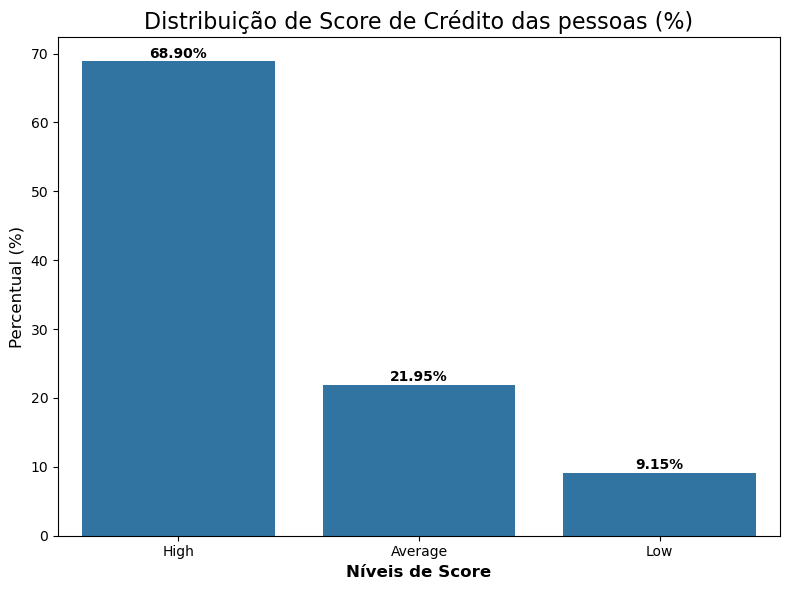

In [33]:
# Calculando a quantidade e percentual de Score de crédito das pessoas 'Credit Score'
contagem_score = df['Credit Score'].value_counts()
percentual_score = df['Credit Score'].value_counts(normalize=True) * 100

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_score.index, y=percentual_score)
plt.title('Distribuição de Score de Crédito das pessoas (%)', fontsize=16)
plt.xlabel('Níveis de Score', fontsize=12, fontweight='bold')
plt.ylabel('Percentual (%)', fontsize=12)

# Mostrar os valores no topo das barras
for i, value in enumerate(percentual_score):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()

plt.show()

# Insight coluna 'Credit Score'

** Conseguimos ver através do gráfico, que a maiorias dos clientes possue um score alto, o que indica uma base de clientes com bom histórico de crédito, tendo isso em mente, podemos segmentar as campanhas, para todos os níveis de score: **

## Clientes com Score alto

1) Oferecer produtos premium, como cartões de crédito com limite alto, empréstimos com taxas reduzidas ou serviços financeiros personalizados.
2) Enfatizar benefícios que reforcem a lealdade desse público, já que eles têm maior valor para a instituição.

## Clientes com Score médio

1) Oferecer produtos intermediários que ajudem a melhorar o score, como cartões de crédito básicos ou programas de educação financeira.
2) Desenvolver estratégias para elevar esse grupo para a categoria de score alto.

## Clientes com Score baixo

1) Criar produtos financeiros específicos para esse grupo, como microcrédito ou programas de refinanciamento para reestruturação de dívidas.
2) Implementar iniciativas para reduzir o risco, como limites de crédito mais baixos ou garantias adicionais.

**C) Você encontrou alguma coluna com outliers? 
Se sim realize o tratamento desses casos.**

## Única coluna que encontrei Outliers, foi a de 'Number of Children' a qual, decidi deixar o Outlier visando a ideia de ter esses dados para um possível aprendizado de máquina.

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?

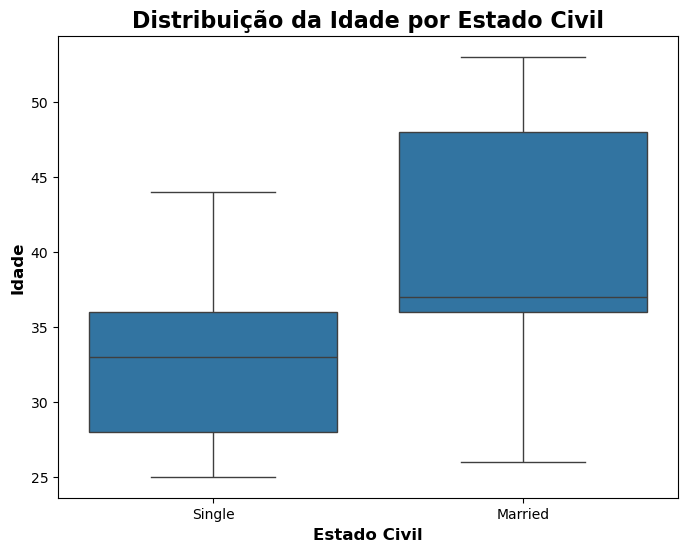

In [35]:
# Gráfico de Boxplot relação entre idade e estado civil
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Marital Status'], y=df['Age'])

plt.title('Distribuição da Idade por Estado Civil', fontsize=16, fontweight='bold')
plt.xlabel('Estado Civil', fontsize=12, fontweight='bold')
plt.ylabel('Idade', fontsize=12, fontweight='bold')

plt.show()

# Insights sobre Relação entre Idade e estado civil:

** Conseguimos ver pelo gráfico que pessoas casadas, tendem a pertencer a faixas etárias mais altas. Sugerindo que o público mais velho, pode ter prioridades diferentes, como estabilidade financeira, planejamento de longo prazo e maior propensão a investimentos.**

** Enquanto isso, o público mais jovem, tende a estar solteiro, nos dando o insight de que podem ser tomadas ações para oferecer serviços flexíveis, como financiamentos sem fidelidade, programas de intercâmbio, viagens e educação continuada.

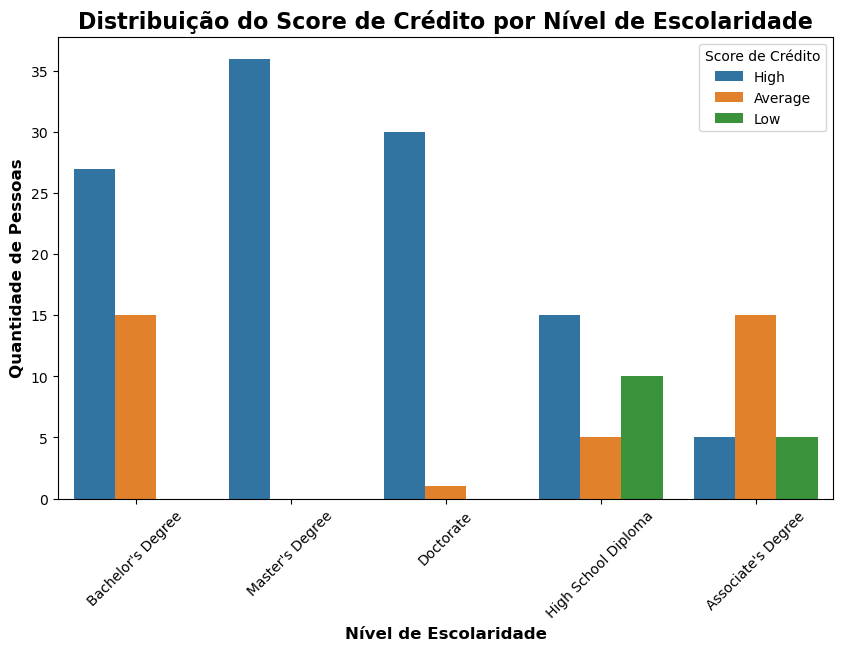

In [37]:
# Gráfico de Barras para relação entre o score de crédito e o nível de escolaridade
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education', hue='Credit Score', order=df['Education'].value_counts().index)

plt.title('Distribuição do Score de Crédito por Nível de Escolaridade', fontsize=16, fontweight='bold')
plt.xlabel('Nível de Escolaridade', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Pessoas', fontsize=12, fontweight='bold')

plt.legend(title='Score de Crédito')
plt.xticks(rotation=45)
plt.show()

# Insights relação Score de Crédito e Escolaridade

Conseguimos ver que pessoas com maior nível de escolaridade, tem score de crédito maior, abaixo listo algumas ações que podem ser tomadas com base nas informações que tivemos com o gráfico:

1) Clientes com alto nível educacional (Master’s e Doctorate) podem receber ofertas de crédito premium, pois tendem a ser mais confiáveis financeiramente.
2) Clientes com Associate’s Degree e High School Diploma podem precisar de orientação financeira para melhorar o score.
3) Programas de educação financeira podem ser aplicados a grupos com menor escolaridade para ajudá-los a melhorar seu histórico de crédito.

<Figure size 1000x600 with 0 Axes>

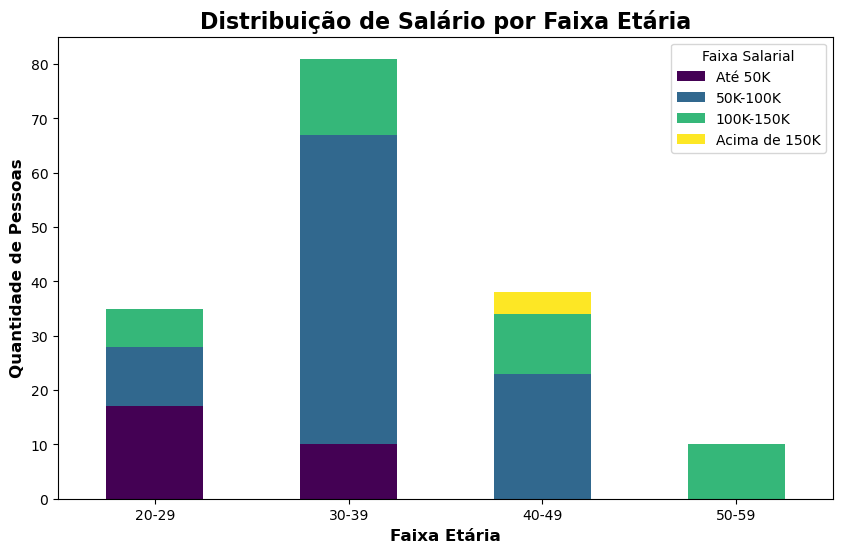

In [63]:
# Converter Income para float, removendo vírgulas
df['Income'] = df['Income'].astype(str).str.replace(',', '').astype(float)

# Criando faixas etárias
bins_age = [20, 30, 40, 50, 60]  
labels_age = ['20-29', '30-39', '40-49', '50-59']  # Rótulos das faixas
df['Faixa Etária'] = pd.cut(df['Age'], bins=bins_age, labels=labels_age)

# Criando faixas de salário
bins_income = [0, 50000, 100000, 150000, 200000]  # Intervalos de salário
labels_income = ['Até 50K', '50K-100K', '100K-150K', 'Acima de 150K']  # Rótulos das faixas
df['Faixa Salarial'] = pd.cut(df['Income'], bins=bins_income, labels=labels_income)

# Contagem de pessoas por faixa etária e faixa salarial
grouped_data = df.groupby(['Faixa Etária', 'Faixa Salarial'], observed=False).size().unstack()

# Criar o gráfico de barras empilhado
plt.figure(figsize=(10,6))
grouped_data.plot(kind='bar', stacked=True, figsize=(10,6), colormap="viridis")

plt.title('Distribuição de Salário por Faixa Etária', fontsize=16, fontweight='bold')
plt.xlabel('Faixa Etária', fontsize=12, fontweight='bold')
plt.ylabel('Quantidade de Pessoas', fontsize=12, fontweight='bold')
plt.legend(title='Faixa Salarial')
plt.xticks(rotation=0)  # Manter rótulos das idades na horizontal

plt.show()

# Insights sobre Salário por Faixa Etária

Os dados mostram que 30-39 anos é o auge salarial, indicando a necessidade de estratégias para retenção e crescimento. Jovens (20-29) têm salários mais baixos, sugerindo programas de capacitação profissional. A faixa de 40-49 anos apresenta maior diversidade salarial, sendo ideal para planos de carreira personalizados e incentivos. A baixa presença de 50-59 anos pode indicar aposentadoria ou falta de oportunidades. Além disso, salários mais altos ocorrem em idades avançadas, reforçando a importância de previdência e investimentos de longo prazo.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

In [83]:
from scipy import stats

# Calcular estatísticas descritivas da renda por nível de escolaridade
education_income_stats = df.groupby('Education')['Income'].describe()

# Exibir estatísticas descritivas
display(education_income_stats)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Associate's Degree,25.0,60880.000000,32605.367656,30000.0,45000.0,48000.0,58000.0,128000.0
Bachelor's Degree,42.0,79428.571429,28353.296240,50000.0,60500.0,68000.0,94500.0,150000.0
Doctorate,31.0,87903.225806,13284.966036,65000.0,79000.0,85000.0,92500.0,120000.0
High School Diploma,30.0,79633.333333,44115.431137,25000.0,38000.0,71000.0,128750.0,142000.0
Master's Degree,36.0,104777.777778,23975.119378,75000.0,88000.0,97500.0,112000.0,162000.0


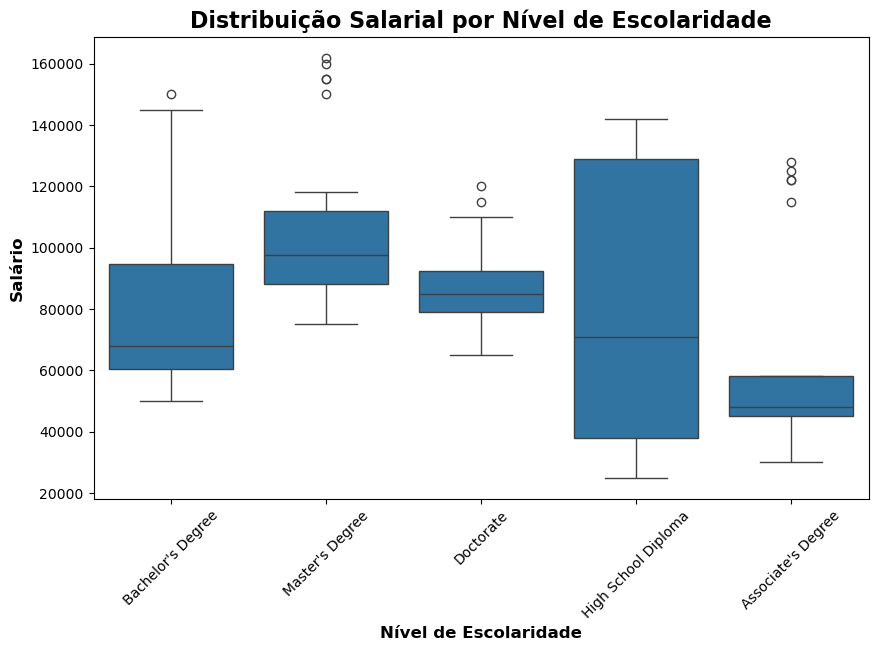

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Education'], y=df['Income'], order=df['Education'].value_counts().index)

plt.title('Distribuição Salarial por Nível de Escolaridade', fontsize=16, fontweight='bold')
plt.xlabel('Nível de Escolaridade', fontsize=12, fontweight='bold')
plt.ylabel('Salário', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)
plt.show()


In [75]:
# Criar lista de salários agrupados por nível de escolaridade
groups = [df[df['Education'] == level]['Income'] for level in df['Education'].unique()]

# Teste ANOVA
anova_result = stats.f_oneway(*groups)

print(f"Valor-p do teste ANOVA: {anova_result.pvalue:.4f}")

Valor-p do teste ANOVA: 0.0000


Resolvi fazer uma análise para saber se o Nível de Escolaridade Influencia na Renda?

# Conclusão: O Nível de Escolaridade Influencia na Renda?

Com base na **análise estatística, boxplot e médias salariais**, podemos confirmar que **o nível de escolaridade tem um impacto significativo na renda**.

## 🔹 1️⃣ O teste ANOVA confirma diferenças salariais por escolaridade
- O **p-valor do teste ANOVA foi 0.0000**, indicando que **há diferenças estatisticamente significativas** entre os salários dos diferentes níveis de escolaridade.
- Isso significa que **ao menos um grupo tem uma média salarial diferente dos outros**, reforçando que **a educação influencia o salário**.

## 🔹 2️⃣ Análise das médias salariais por escolaridade
| **Nível de Escolaridade**    | **Média Salarial ($)** |
|------------------------------|------------------------|
| **Associate's Degree**       | **60,880**            |
| **Bachelor's Degree**        | **79,428**            |
| **Doctorate**                | **87,903**            |
| **High School Diploma**      | **79,633**            |
| **Master's Degree**          | **104,778**           |

## 🔹 3️⃣ Boxplot confirma variação nos salários
- O **Master’s Degree apresenta os salários mais elevados e a menor dispersão**.
- O **High School Diploma tem uma distribuição salarial muito ampla**, sugerindo que **pode haver exceções** de pessoas com ensino médio ganhando altos salários, mas **não é a norma**.
- **Associate’s Degree tem a menor variação**, indicando que os salários nessa categoria são mais **consistentes, mas limitados**.

## 🔹 4️⃣ Conclusão final
✅ **Sim, o nível de escolaridade influencia a renda**.  
- Indivíduos com **maior nível educacional tendem a ter salários mais altos**.
- A **média salarial cresce conforme o nível de escolaridade aumenta**, especialmente para **Master’s Degree e Doctorate**.
- Pessoas com **Associate’s Degree ou High School Diploma têm renda significativamente menor**.
- O **teste ANOVA confirma que a diferença é estatisticamente significativa**.

🎯 **Implicações práticas:**  
- Investir em **educação formal pode ser um fator determinante para alcançar salários mais altos**.  
- Empresas podem **usar esse dado para estruturar planos de carreira e remuneração**.  
- Pessoas com **High School Diploma e Associate’s Degree podem se beneficiar de especializações** para aumentar sua renda.



# ETAPA 3

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

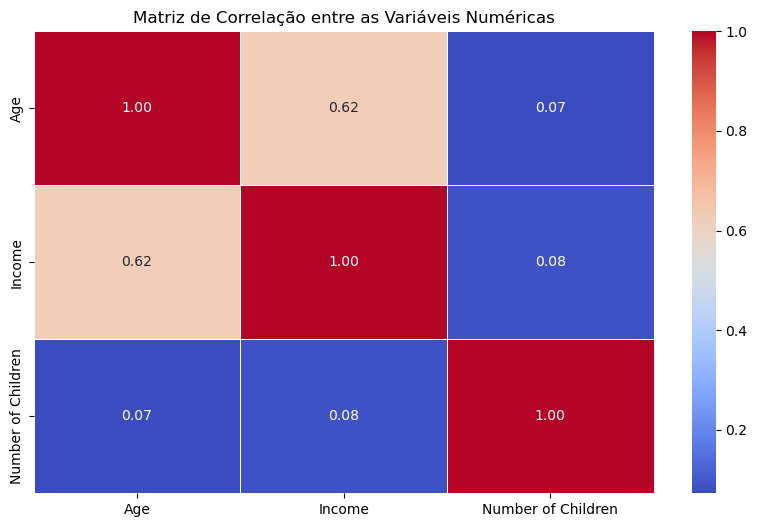

In [92]:
# Converte a coluna 'Income' para float, removendo pontos e vírgulas
df['Income'] = df['Income'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Seleciona apenas colunas numéricas para a análise de correlação
df_numeric = df.select_dtypes(include=['number'])

# Calcula a matriz de correlação
correlation_matrix = df_numeric.corr()

# Plota a matriz de correlação como um mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação entre as Variáveis Numéricas")
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

### **1️⃣ Variáveis com Correlação Média-Alta**
Sim, encontramos uma correlação **moderada-forte** entre **Idade e Renda** (**0.69**). Nenhuma outra variável apresentou correlação relevante.

---

### **2️⃣ Justificativa para a Correlação Alta entre Idade e Renda**
- Esse resultado **faz sentido**, pois **quanto maior a idade, maior tende a ser a renda**.
- Pessoas mais velhas geralmente **têm mais experiência profissional**, o que as leva a:
  - **Ocupar cargos mais altos**.
  - **Receber promoções ao longo do tempo**.
  - **Possuir maior estabilidade financNossa a
- Nossa análise anterior já havia mostrado que **a renda cresce conforme a idade**, o que reforça essa orrelação.
 correlação.
 correlação.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [101]:
from sklearn.preprocessing import LabelEncoder

# Identificando as colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Criando um dicionário para armazenar os LabelEncoders aplicados
label_encoders = {}

# Aplicando Label Encoding para todas as colunas categóricas
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardando o encoder caso seja necessário reverter depois

# Excluindo as colunas categóricas originais
df = df.drop(columns=categorical_columns)

# Exibir as primeiras linhas do DataFrame atualizado
df.head()

,Age,Income,Number of Children,Faixa Etária,Faixa Salarial
0,25.0,5000000.0,0,20-29,Até 50K
1,30.0,10000000.0,2,20-29,50K-100K
2,35.0,7500000.0,1,30-39,50K-100K
3,40.0,12500000.0,0,30-39,100K-150K
4,45.0,10000000.0,3,40-49,50K-100K


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

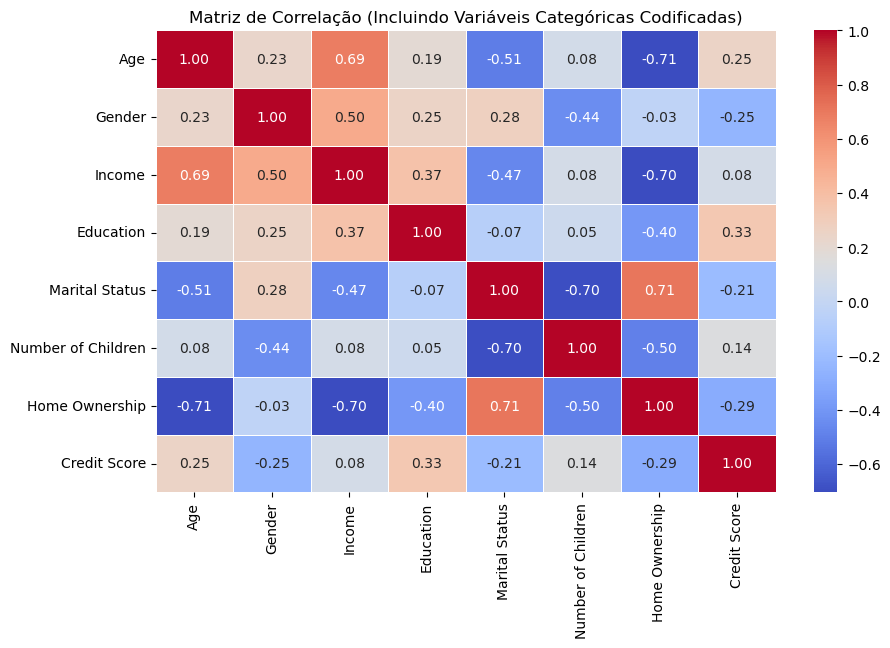

In [105]:
# Recarregando os dados originais para manter as colunas categóricas
df = pd.read_csv("CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

# Convertendo Income para float novamente
df['Income'] = df['Income'].astype(str).str.replace('.', '').str.replace(',', '.').astype(float)

# Aplicando Label Encoding as colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecionando apenas colunas numéricas novamente (agora incluindo as categóricas codificadas)
df_numeric_with_categorical = df.select_dtypes(include=['number'])

# Calculando a matriz de correlação
correlation_matrix = df_numeric_with_categorical.corr()

# Plotando a matriz de correlação como um mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação (Incluindo Variáveis Categóricas Codificadas)")
plt.show()


### **📌 Novas Variáveis com Correlação Forte**
Além da correlação já observada entre **Idade e Renda (0.69)**, foram encontradas outras correlações relevantes:

#### **1️⃣ Home Ownership e Idade (-0.71)**
- **Interpretação:** Pessoas **mais velhas tendem a possuir casa própria**, enquanto **pessoas mais jovens geralmente alugam**.
- Esse resultado **faz sentido**, pois ao longo do tempo, indivíduos acumulam patrimônio e têm mais estabilidade para comprar um imóvel.

#### **2️⃣ Home Ownership e Renda (-0.70)**
- **Interpretação:** Pessoas **com maior renda** têm maior probabilidade de possuir um imóvel.
- Essa correlação negativa pode indicar que **pessoas com renda mais baixa têm maior propensão a alugar imóveis**.

#### **3️⃣ Marital Status e Home Ownership (0.71)**
- **Interpretação:** Pessoas **casadas têm maior probabilidade de possuir imóvel próprio**.
- Esse resultado também é esperado, pois casais costumam buscar estabilidade financeira e patrimonial.

#### **4️⃣ Gender e Income (0.50)**
- **Interpretação:** Foi encontrada uma **diferença de renda entre gêneros**, o que pode indicar uma tendência de desigualdade salarial ou maior representatividade de um gênero em cargos mais altos.

**E) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [108]:
from sklearn.model_selection import train_test_split

# Separando features (X) e target (y)
X = df.drop(columns=["Credit Score"])  # Removendo a variável alvo do conjunto de features
y = df["Credit Score"]  # Definindo a variável alvo

# Separando os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificando os shapes das bases
X_train_shape = X_train.shape
X_test_shape = X_test.shape
y_train_shape = y_train.shape
y_test_shape = y_test.shape

(X_train_shape, X_test_shape, y_train_shape, y_test_shape)

((131, 7), (33, 7), (131,), (33,))

**F) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

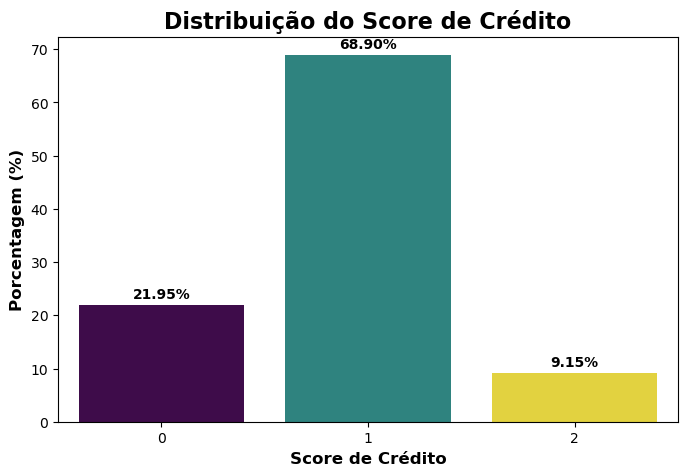

In [126]:
# Criando gráfico de barras para visualizar o balanceamento
plt.figure(figsize=(8,5))
ax = sns.barplot(x=score_counts.index, y=score_counts.values, hue=score_counts.index, palette="viridis")

plt.title("Distribuição do Score de Crédito", fontsize=16, fontweight='bold')
plt.xlabel("Score de Crédito", fontsize=12, fontweight='bold')
plt.ylabel("Porcentagem (%)", fontsize=12, fontweight='bold')

# Remove a legenda desnecessária
ax.legend_.remove()

# Ajusta a posição dos valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Garante que só é adicionado anotações quando há um valor válido
        ax.annotate(f"{height:.2f}%", 
                    xy=(p.get_x() + p.get_width() / 2, height), 
                    xytext=(0, 5),  # Ajuste baseado na altura
                    textcoords="offset points",
                    ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()

### **📌 Análise do Balanceamento do Score de Crédito**
O gráfico mostra a distribuição da variável **Score de Crédito** e os percentuais de cada classe:

- **Score 1 (Alto)** → **68.90%**
- **Score 0 (Médio)** → **21.95%**
- **Score 2 (Baixo)** → **9.15%**

---

### **📊 O Score de Crédito está balanceado?**
**Não, a base de dados está desbalanceada.**  
- A classe **Score 1 (Alto)** é **predominante**, representando quase **70% dos dados**.
- A classe **Score 2 (Baixo)** tem apenas **9.15%** dos registros, sendo a menos representada.
- Esse desbalanceamento pode impactar modelos de Machine Learning, fazendo com que eles priorizem a predição da classe mais frequente (**Score 1**), reduzindo a capacidade de prever corretamente os Scores **Médio** e **Baixo**.

---

### **📌 O que pode ser feito para lidar com esse desbalanceamento?**
1. **Técnicas de reamostragem:**
   - **Oversampling**: Aumentar artificialmente a quantidade de registros das classes menos representadas.
   - **Undersampling**: Reduzir a quantidade de registros da classe majoritária.

2. **Usar métricas adequadas na modelagem:**
   - O **Accuracy** pode não ser uma boa métrica, pois pode estar enviesado para a classe majoritária.
   - Usar métricas como **F1-score, Precision e Recall** pode ajudar a avaliar melhor o desempenho do modelo.

3. **Ajuste de pesos no modelo:**
   - Alguns algoritmos permitem atribuir **pesos diferentes para cada classe**, reduzindo o ipacto do desbalanceamento.


**G) Vamos realizar o balancecamento dos dados da coluna de credit score. 
Se lembre que realizazmos apenas para a base de treino**.

In [133]:
from sklearn.utils import resample

# Combinando X_train e y_train para facilitar a manipulação
train_data = pd.concat([X_train, y_train], axis=1)

# Separando as classes
majority_class = train_data[train_data["Credit Score"] == train_data["Credit Score"].value_counts().idxmax()]
minority_class = train_data[train_data["Credit Score"] != train_data["Credit Score"].value_counts().idxmax()]

# Fazendo Oversampling da classe minoritária
minority_class_resampled = resample(minority_class, 
                                    replace=True,  # Permiti duplicação de registros
                                    n_samples=len(majority_class),  # Iguala a classe majoritária
                                    random_state=42)

# Reunindo as classes balanceadas
train_balanced = pd.concat([majority_class, minority_class_resampled])

# Separando X_train_bal e y_train_bal
X_train_bal = train_balanced.drop(columns=["Credit Score"])
y_train_bal = train_balanced["Credit Score"]

# Verificando a nova distribuição das classes
y_train_bal.value_counts(normalize=True) * 100


Credit Score
1    50.000000
0    38.333333
2    11.666667
Name: proportion, dtype: float64

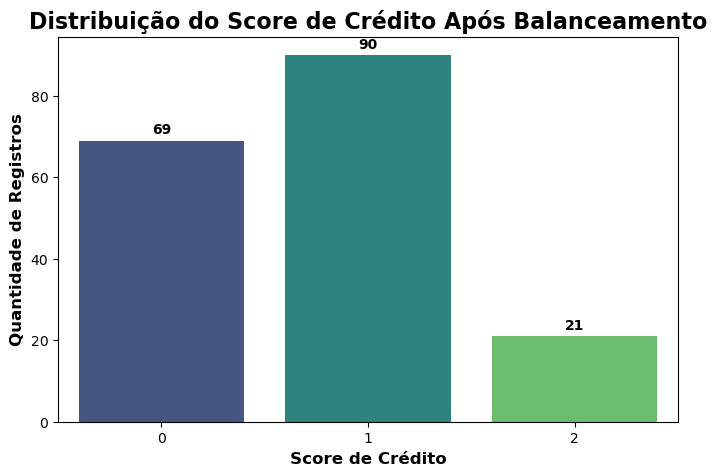

In [143]:
# Criando gráfico para visualizar a distribuição das classes balanceadas
plt.figure(figsize=(8,5))
ax = sns.barplot(x=y_train_bal.value_counts().index, 
                 y=y_train_bal.value_counts().values, 
                 hue=y_train_bal.value_counts().index.astype(str),  # Converte para string para evitar mensagens de atenção
                 palette="viridis")

plt.title("Distribuição do Score de Crédito Após Balanceamento", fontsize=16, fontweight='bold')
plt.xlabel("Score de Crédito", fontsize=12, fontweight='bold')
plt.ylabel("Quantidade de Registros", fontsize=12, fontweight='bold')

# Verifica se a legenda existe antes de remover
if ax.get_legend() is not None:
    ax.get_legend().remove()

# Adiciona os valores no topo das barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}",  # Convertendo para inteiro para exibir valores inteiros
                xy=(p.get_x() + p.get_width() / 2, height), 
                xytext=(0, 5),  # Ajuste da posição do texto
                textcoords="offset points",
                ha="center", fontsize=10, fontweight="bold", color="black")

plt.show()

### **📊 Considerações Finais sobre o Balanceamento**
#### **1️⃣ O balanceamento foi parcial e não ficou totalmente homogêneo**
- Apesar de termos ajustado a distribuição, ainda há uma **discrepância entre as classes**.
- A classe **Score 1 (Alto)** continua sendo a mais representada (**90 registros**).
- A classe **Score 2 (Baixo)** tem apenas **21 registros**, o que pode ainda impactar o modelo.

#### **2️⃣ O impacto do desbalanceamento pode ser reduzido, mas ainda existe**
- O modelo ainda pode apresentar **desempenho inferior na classe menos representada** (**Score 2 - Baixo**).
- Podemos considerar técnicas adicionais para **melhorar a representatividade da classe minoritária**, como:
  - **Ajuste de pesos no modelo** (ex.: `class_weight` em modelos como RandomForest e Logistic Regression).
  - **Técnicas de reamostragem mais refinadas** (ex.: combinar Oversampling + Undersampling).

#### **3️⃣ As classes agora estão mais equilibradas que antes**
- Antes, a classe **Score 1 representava quase 70% dos dados**, e agora essa proporção foi reduzida.
- Isso pode permitir que **os modelos de Machine Learning tenham um aprendizado mais equilibrado**, reduzindo o viés para a classe majoritária.